In [1]:
import cmeutils
from cmeutils.sampling import is_equilibrated
from cmeutils.structure import bond_distribution

import matplotlib.pyplot as plt
import numpy as np
import signac
import gsd

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

****** PyMBAR will use 64-bit JAX! *******
* JAX is currently set to 32-bit bitsize *
* which is its default.                  *
*                                        *
* PyMBAR requires 64-bit mode and WILL   *
* enable JAX's 64-bit mode when called.  *
*                                        *
* This MAY cause problems with other     *
* Uses of JAX in the same code.          *
******************************************



In [2]:
project = signac.get_project("../melt-flow/")

973553af77ea294a03f9d2f5709b40e1
7e0516e7e3a11002e4cc25e06f43ac9d
c3dd836e73da21f12b07c6f26e90e855
f6e81418769fcb4d1d2784d42df8a377
bf06cb781440d6bf5a7fde58e916850a
315672cdcc998d82ec0e11aef44d9b42
930f225e313bddf3ffd1db76e6aed45c


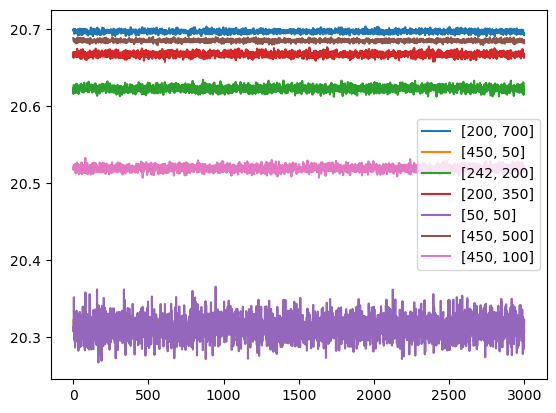

In [11]:
for job in project.find_jobs({"dt": 0.012}):
    print(job)
    try:
        data = np.genfromtxt(job.fn(f"log{job.doc.runs}.txt"), names=True)
    except:
        data = np.genfromtxt(job.fn("log1.txt"), names=True)
    N = job.sp.MN[0] * job.sp.MN[1]
    pe = data["mdcomputeThermodynamicQuantitiespotential_energy"] / N
    pair = data["mdpairLJenergy"] / N
    bond = data["mdbondFENEWCAenergy"] / N
    plt.plot(bond[-3000:], label=job.sp.MN)

plt.legend()

# Check Average Bond Lengths:

In [ ]:
fig = plt.figure()

for job in project.find_jobs({"dt": 0.012}):
    try:
        bdist = bond_distribution(
            gsd_file=job.fn(f"trajectory1.gsd"),
            start=-20,
            stop=-1,
            A_name="A",
            B_name="A",
            histogram=True,
        )
        plt.plot(bdist[:,0], bdist[:,1], label=job.sp.MN)
    except:
        print(job.id)
    
plt.vlines(x=0.97, ymin=0, ymax=0.50, linestyle="--", color="r")
plt.xlim(0.8, 1.2)
plt.legend()

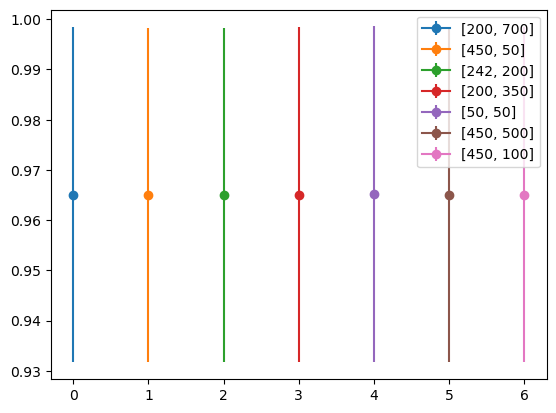

In [20]:
fig = plt.figure()
count = 0
for job in project.find_jobs({"dt": 0.012}):
    try:
        bdist = bond_distribution(
            gsd_file=job.fn(f"trajectory1.gsd"),
            start=-20,
            stop=-1,
            A_name="A",
            B_name="A",
            histogram=False,
        )
        bond_mean = np.mean(bdist)
        bond_std = np.std(bdist)
        plt.errorbar(x=count, y=bond_mean, yerr=bond_std, label=job.sp.MN, marker="o")
        count += 1
    except:
        print(job.id)

plt.legend()
plt.show()

(0.5, 1.5)

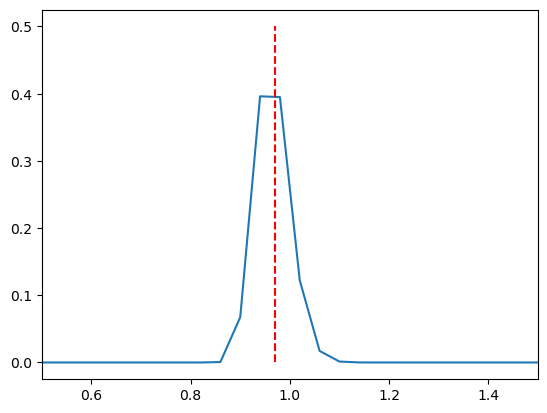

In [17]:
plt.plot(bdist[:,0], bdist[:,1])
plt.vlines(x=0.97, ymin=0, ymax=0.50, linestyle="--", color="r")
plt.xlim(0.5, 1.5)